In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install pycaret

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import sqrt
import plotly
import plotly.offline as py
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)
from yellowbrick.features import FeatureImportances

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [2]:
data = pd.read_csv('heart.csv', sep=',')
data
df1 = data.copy()

data

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

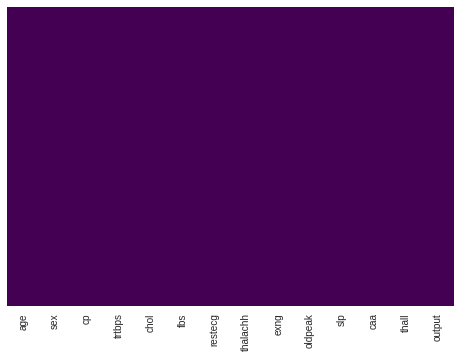

In [3]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

**Sobre esse dataset**

* Age : Idade do paciente
_________________________

* Sex : Sexo do paciente

___________________________

* exang: Angina induzida por exercício (1 = sim; 0 = não)
________________________________________________________________

* ca: Número de vasos principais coloridos por fluoroscopia (0-3)
______________________________________________________________________

* cp : Tipos de dores no Peito 

Valor 1: Agina Tipica

Valor 2: Angina Atípica

Valor 3: Dor não anginosa

Valor 4: Assintomático
________________________________________________________________________

* trtbps : Pressão Arterial em descanso (in mm Hg)
_____________________________________________________________________________

* chol : Colestoral in mg/dl fetched via BMI sensor
_______________________________________________________________________________

* fbs : (Açucar no sangue me Jejum > 120 mg/dl) (1 = verdadeiro; 0 = falso)
_________________________________________________________________________________

* rest_ecg : resultados eletrocardiográficos em repouso

Value 0: normal

Value 1: tendo anormalidade da onda ST-T (inversões da onda T e / ou elevação ou depressão ST> 0,05 mV)

Value 2: mostrando hipertrofia ventricular esquerda provável ou definitiva 
_____________________________________________________________________________________________________

* thalach : frequência cardíaca máxima alcançada
____________________________________________________________________________________________________

* target : 0 = menos chance de ter ataque cardíaco 1 = mais chances de ter ataque cardiaco
_______________________________________________________________________________________________________


### Após consulta a fontes médicas, algumas variáveis  do modelo foram categorizadas, para facilitar a construção e elaboração da Análise Exploratória de Dados.


* Níveis de Colesteral

101 até 130 = Normal

131 até 160 = Normal / Alto

161 até 190 = High

Acima 190 = Very high

-------------
* trtbps ou Pressão Arterial em descanso em mm Hg)

menor do que 120 mm Hg = normal

120 até 129 = pré hipertensão

130 até 139 = estágio 1 hipertensão

140 até 179 = estágio 2 hipertensão

Acima 180 = Crise Hipertensiva



In [9]:
def categoriaa(f):
    if f == 0:
       return 'Mulher'
    elif f == 1:
       return 'Homem'

def categoria(e):
    if e == 0:
       return 'falso'
    elif e == 1:
       return 'verdadeiro'

def categorizasss(d):
    if d == 0:
       return 'typical angina'
    elif d == 1:
       return 'atypical angina'
    elif d == 2:
       return 'atypical angina'
    elif d == 3:
       return 'asymptomatic'

def categoriza(s):
    if s <= 130:
       return 'normal'
    elif s <= 160:
       return 'normal-alto'
    elif s <= 190:
       return 'alto'
    elif s >= 190:
       return 'muito-alto'

def categorizas(a):
    if a <= 120:
       return 'normal'
    elif a <= 129:
       return 'pre-hipertensao'
    elif a <= 139:
       return 'hipertensao-estagio-1'
    elif a <= 179:
       return 'hipertensao-estagio-2'
    elif a >= 180:
       return 'crise-hipertensiva'

def categorizass(b):
    if b == 0:
       return 'não'
    elif b <= 1:
       return 'sim'
    

In [5]:
data['cat_col'] = data['chol'].apply(categoriza)
data['cat_trtbps'] = data['trtbps'].apply(categorizas)
data['resul'] = data['output'].apply(categorizass)
data['cp_cat'] = data['cp'].apply(categorizasss)
data['fbs_cat'] = data['fbs'].apply(categoria)
data['sex_cat'] = data['sex'].apply(categoriaa)

In [6]:
data

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output      cat_col             cat_trtbps resul  \
0      0      1       1   muito-alto  hipertensao-estagio-2   sim   
1      0      2       1   muito-alto  hipertensao-estagio-1   sim   
2      0      2       1   muito-alto  hipertensao-estagio-1   sim   
3      0      2       1   muito-alto                 normal   sim   
4      0      2       1   muito-alto                 normal   sim   
..   ...    ...     ...          ...                    ...   ...   
298    0      3       0   muito-alto  hipertensao-estagio-2   não   
299    0      3       0   muito-alto                 normal   não   
300    2      3       0   muito-alto  hipertensao-estagio-2   não   
301    1      3       0  normal-alto  hipertensao-estagio-1   não   
302    1      2       0   muito-alto  hipertensao-estagio-1   não   

              cp_cat     fbs_cat sex_cat  
0       asymptomatic  verdadeiro   Homem  
1    atypical angina       falso   Homem  
2    atypical angina       falso  Mulher  
3    atypical angina       falso   Homem  
4     typical angina       falso  Mulher  
..               ...         ...     ...  
298   typical angina       falso  Mulher  
299     asymptomatic       falso   Homem  
300   typical angina  verdadeiro   Homem  
301   typical angina       falso   Homem  
302  atypical angina       falso  Mulher  

[303 rows x 20 columns]

**Great!** We don't have any gap in data. 

In [7]:
data.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

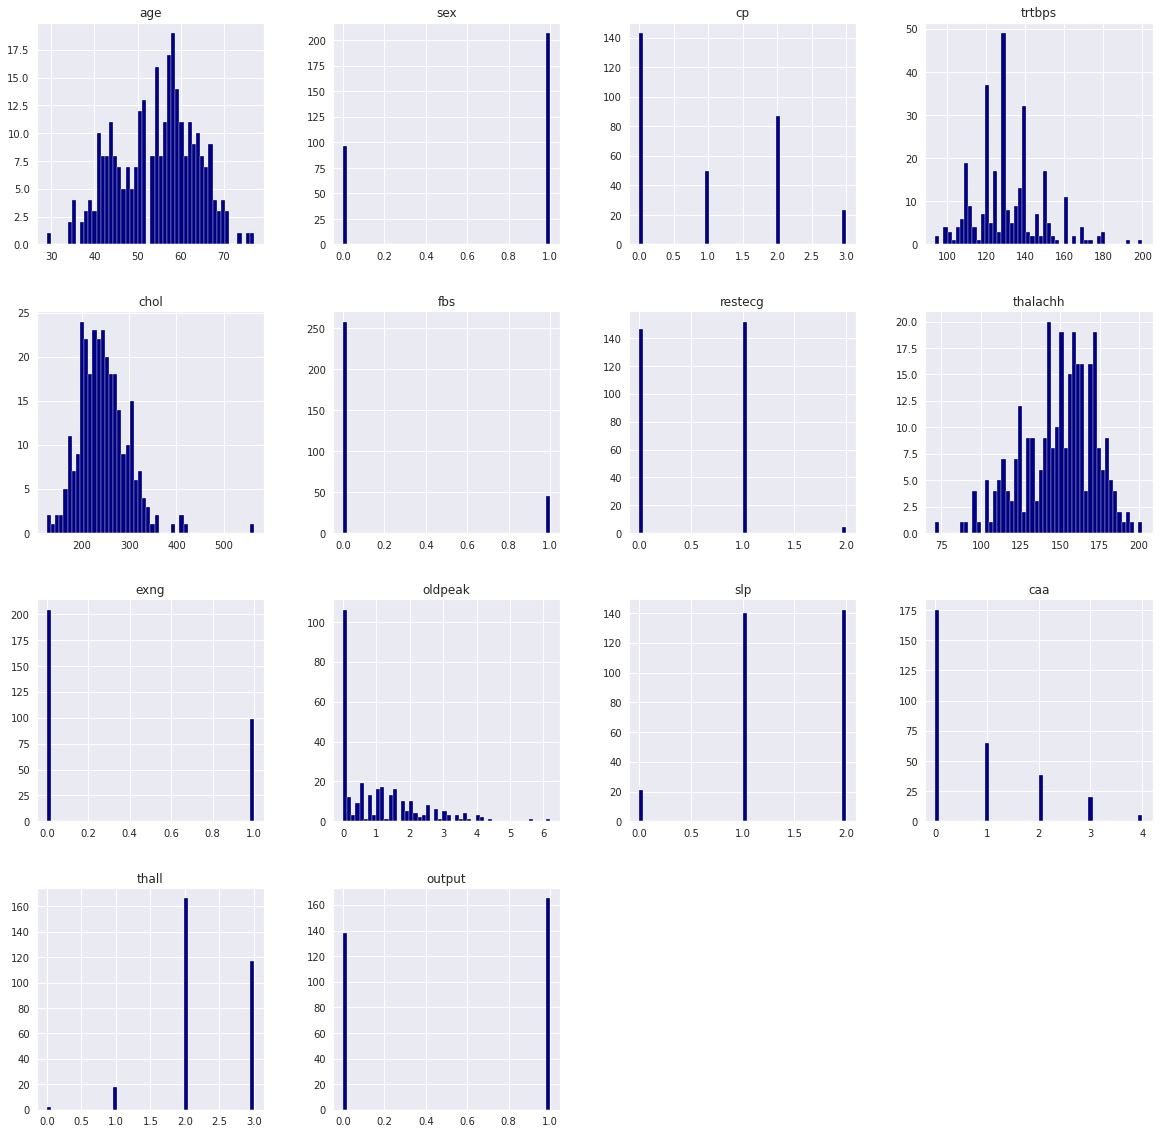

In [8]:
sns.set_style('dark')
data.hist(bins=50,figsize=(20,20),color='navy',)

Text(0, 0.5, 'Quantidade Pessoas Ataque Cardicado')

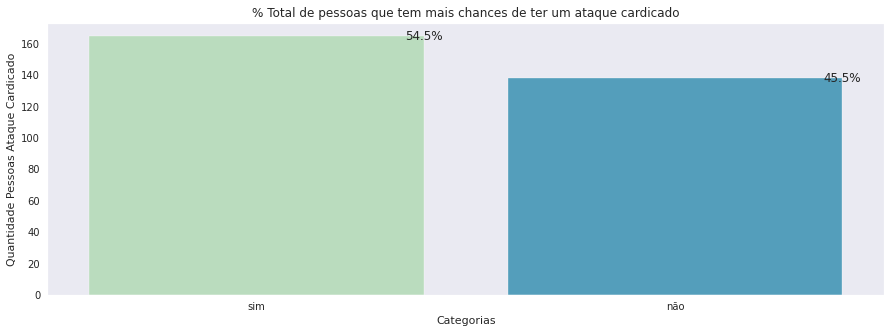

In [10]:
plt.figure(figsize=(15,5))
splot=sns.countplot(data=data,x='resul',palette='GnBu')
sns.set_style('ticks')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("% Total de pessoas que tem mais chances de ter um ataque cardicado")
plt.xlabel("Categorias")
plt.ylabel("Quantidade Pessoas Ataque Cardicado")

Text(0, 0.5, '% Pessoas Pressão Arterial')

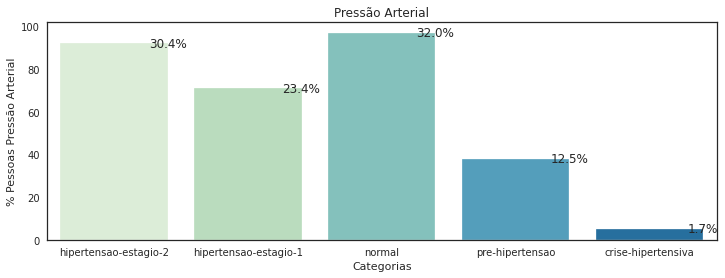

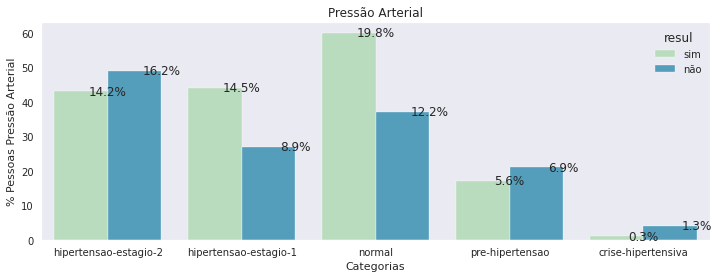

In [11]:
plt.figure(figsize=(12,4))
splot=sns.countplot(data=data,x='cat_trtbps',palette='GnBu')
sns.set_style('dark')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Pressão Arterial")
plt.xlabel("Categorias")
plt.ylabel("% Pessoas Pressão Arterial")


plt.figure(figsize=(12,4))
splot=sns.countplot(data=data,x='cat_trtbps',palette='GnBu', hue='resul')
sns.set_style('dark')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Pressão Arterial")
plt.xlabel("Categorias")
plt.ylabel("% Pessoas Pressão Arterial")

Text(0, 0.5, '% Pessoas com diferente tipos de colesterol')

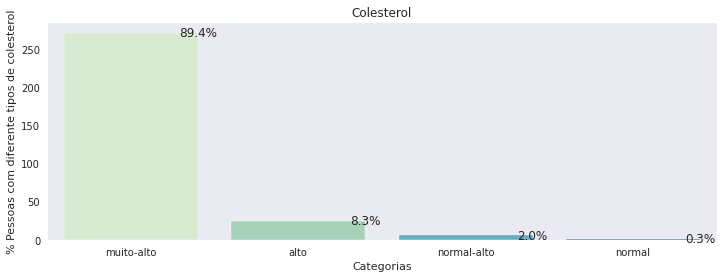

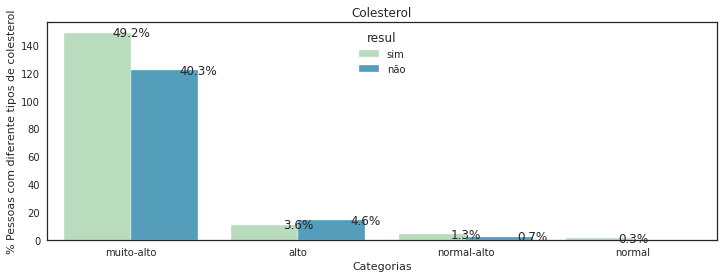

In [12]:
plt.figure(figsize=(12,4))
splot=sns.countplot(data=data,x='cat_col',palette='GnBu')
sns.set_style('ticks')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Colesterol")
plt.xlabel("Categorias")
plt.ylabel("% Pessoas com diferente tipos de colesterol")


plt.figure(figsize=(12,4))
splot=sns.countplot(data=data,x='cat_col',palette='GnBu', hue='resul')
sns.set_style('ticks')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Colesterol")
plt.xlabel("Categorias")
plt.ylabel("% Pessoas com diferente tipos de colesterol")

Text(0, 0.5, '% Genero')

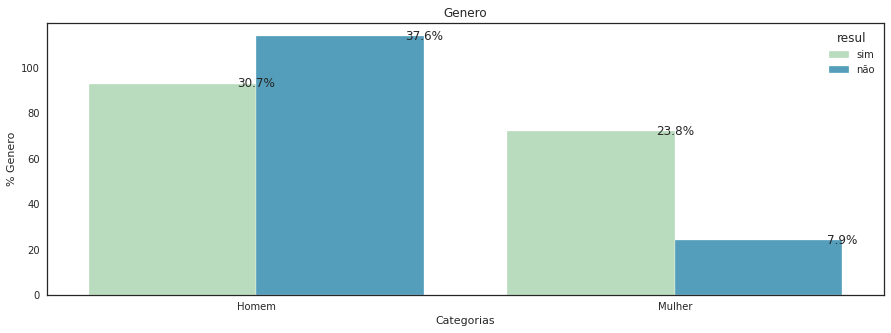

In [13]:
plt.figure(figsize=(15,5))
splot=sns.countplot(data=data,x='sex_cat',palette='GnBu', hue='resul')
sns.set_style('ticks')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Genero")
plt.xlabel("Categorias")
plt.ylabel("% Genero")

Text(0, 0.5, 'Quantidade de pessoas')

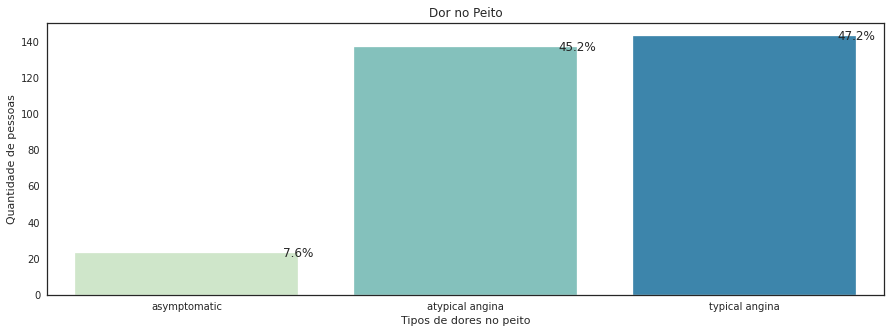

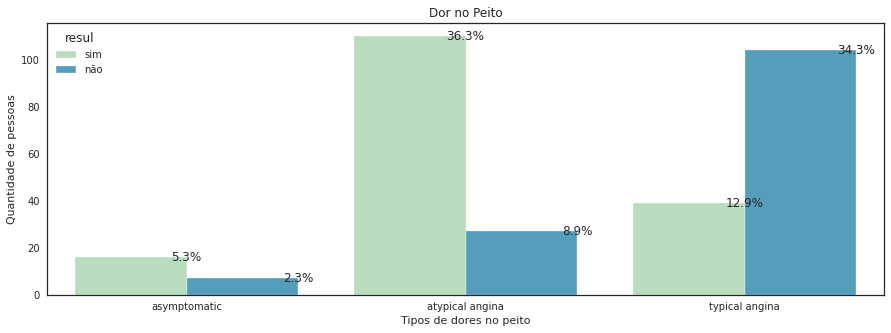

In [14]:
plt.figure(figsize=(15,5))
splot=sns.countplot(data=data,x='cp_cat',palette='GnBu')
sns.set_style('ticks')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Dor no Peito")
plt.xlabel("Tipos de dores no peito")
plt.ylabel("Quantidade de pessoas")

plt.figure(figsize=(15,5))
splot=sns.countplot(data=data,x='cp_cat',palette='GnBu', hue='resul')
sns.set_style('ticks')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Dor no Peito")
plt.xlabel("Tipos de dores no peito")
plt.ylabel("Quantidade de pessoas")

Text(0, 0.5, 'Quantidade de Pessoas')

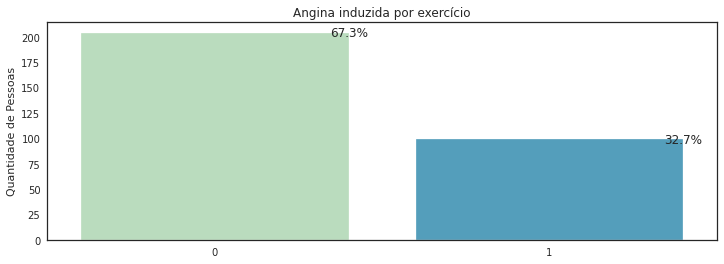

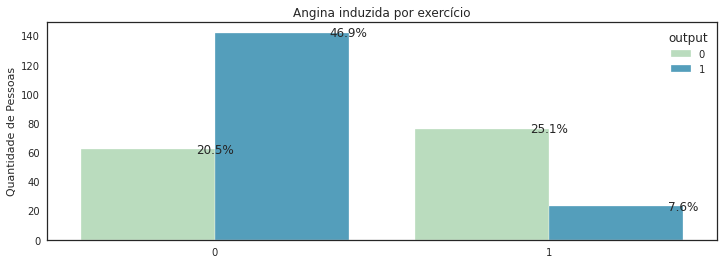

In [15]:
plt.figure(figsize=(12,4))
splot=sns.countplot(data=data,x='exng',palette='GnBu')
sns.set_style('ticks')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Angina induzida por exercício")
plt.xlabel("")
plt.ylabel("Quantidade de Pessoas")

plt.figure(figsize=(12,4))
splot=sns.countplot(data=data,x='exng',palette='GnBu', hue='output')
sns.set_style('ticks')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Angina induzida por exercício")
plt.xlabel("")
plt.ylabel("Quantidade de Pessoas")

Text(0, 0.5, 'Quantidade de pessoas')

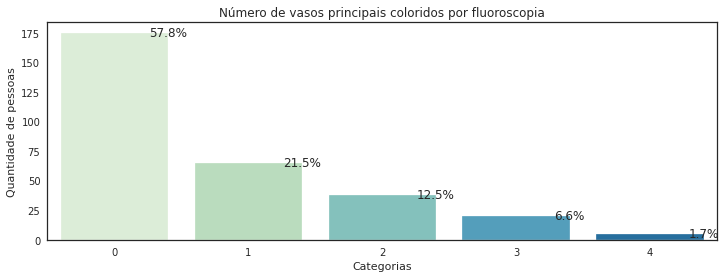

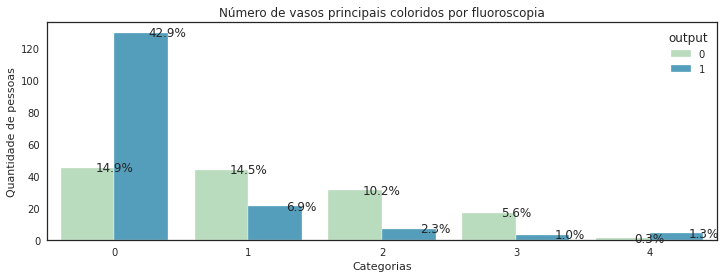

In [16]:
plt.figure(figsize=(12,4))
splot=sns.countplot(data=data,x='caa',palette='GnBu')
sns.set_style('ticks')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Número de vasos principais coloridos por fluoroscopia")
plt.xlabel("Categorias")
plt.ylabel("Quantidade de pessoas")

plt.figure(figsize=(12,4))
splot=sns.countplot(data=data,x='caa',palette='GnBu', hue='output')
sns.set_style('ticks')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Número de vasos principais coloridos por fluoroscopia")
plt.xlabel("Categorias")
plt.ylabel("Quantidade de pessoas")


Text(0, 0.5, 'Quantidade de pessoas')

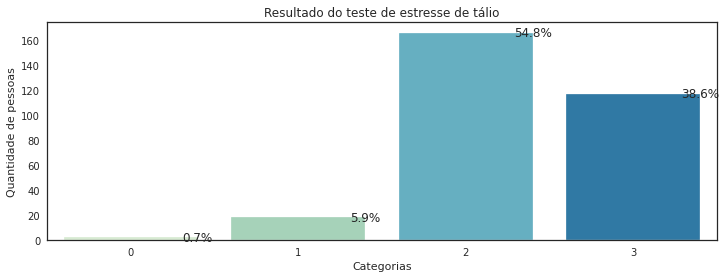

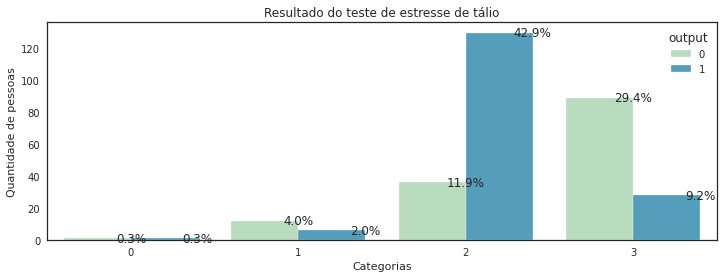

In [17]:
plt.figure(figsize=(12,4))
splot=sns.countplot(data=data,x='thall',palette='GnBu')
sns.set_style('ticks')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Resultado do teste de estresse de tálio")
plt.xlabel("Categorias")
plt.ylabel("Quantidade de pessoas")

plt.figure(figsize=(12,4))
splot=sns.countplot(data=data,x='thall',palette='GnBu', hue='output')
sns.set_style('ticks')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Resultado do teste de estresse de tálio")
plt.xlabel("Categorias")
plt.ylabel("Quantidade de pessoas")


Text(0, 0.5, 'Quantidade de Pessoas')

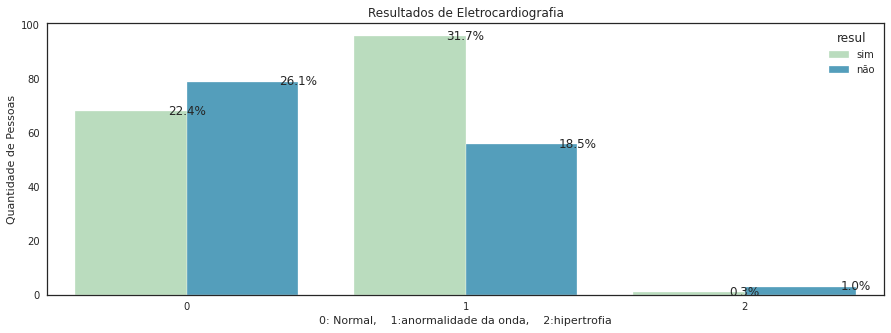

In [18]:
plt.figure(figsize=(15,5))
splot=sns.countplot(data=data,x='restecg',palette='GnBu', hue='resul')
sns.set_style('ticks')
total = float(len(data))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Resultados de Eletrocardiografia")
plt.xlabel("0: Normal,    1:anormalidade da onda,    2:hipertrofia")
plt.ylabel("Quantidade de Pessoas")

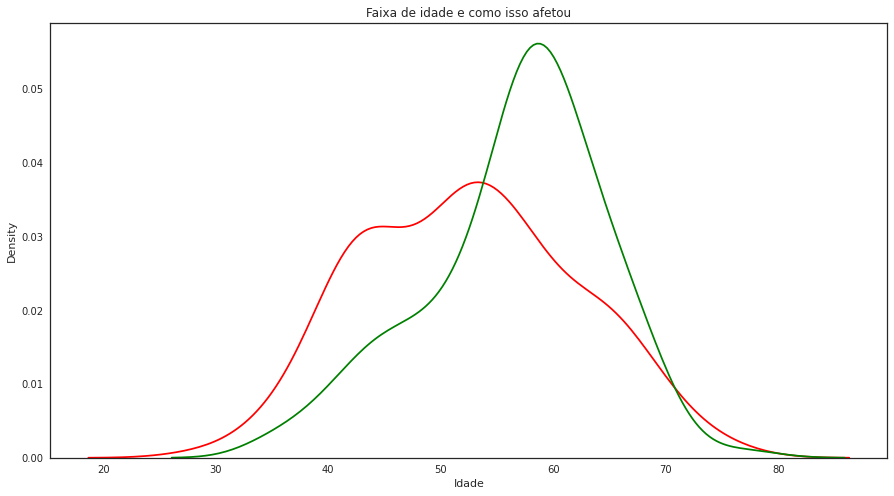

In [19]:
plt.figure(figsize=(15,8))
sns.kdeplot(data[data['output']==1]['age'],color='red',label='Resultado: Sim')
sns.kdeplot(data[data['output']==0]['age'],color='green',label='Resultado: Não')
plt.title('Faixa de idade e como isso afetou')
plt.xlabel('Idade')
plt.show()

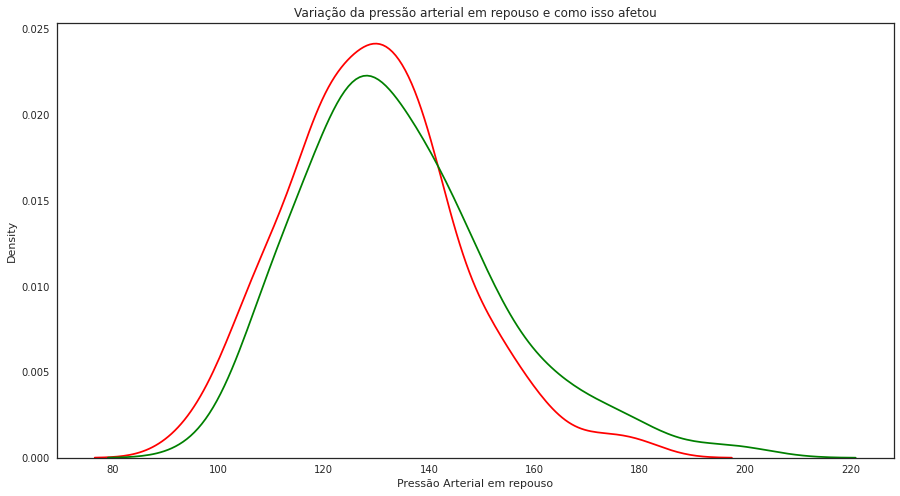

In [20]:
plt.figure(figsize=(15,8))
sns.kdeplot(data[data['output']==1]['trtbps'],color='red',label='Resultado: Sim')
sns.kdeplot(data[data['output']==0]['trtbps'],color='green',label='Resultado: Não')
plt.title('Variação da pressão arterial em repouso e como isso afetou')
plt.xlabel("Pressão Arterial em repouso")
plt.show()

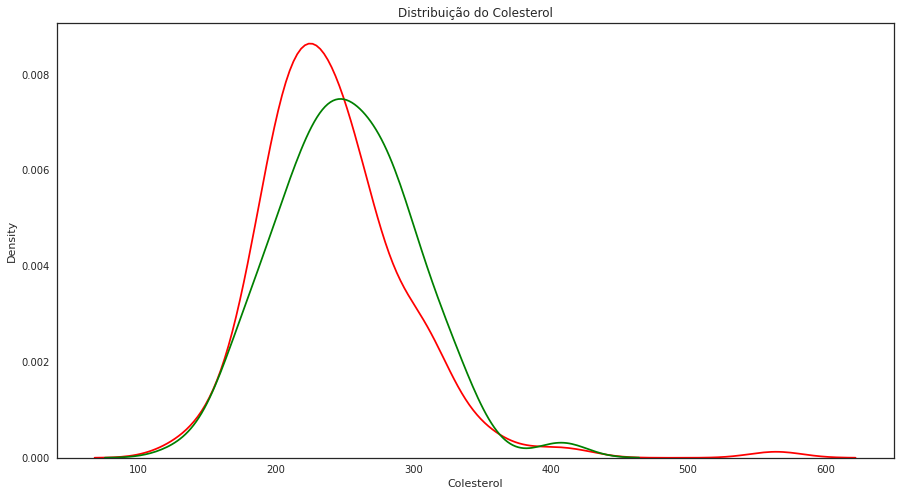

In [21]:
plt.figure(figsize=(15,8))
sns.kdeplot(data[data['output']==1]['chol'],color='red',label='Resultado: Sim')
sns.kdeplot(data[data['output']==0]['chol'],color='green',label='Resultado: Não')
plt.title('Distribuição do Colesterol')
plt.xlabel("Colesterol")
plt.show()

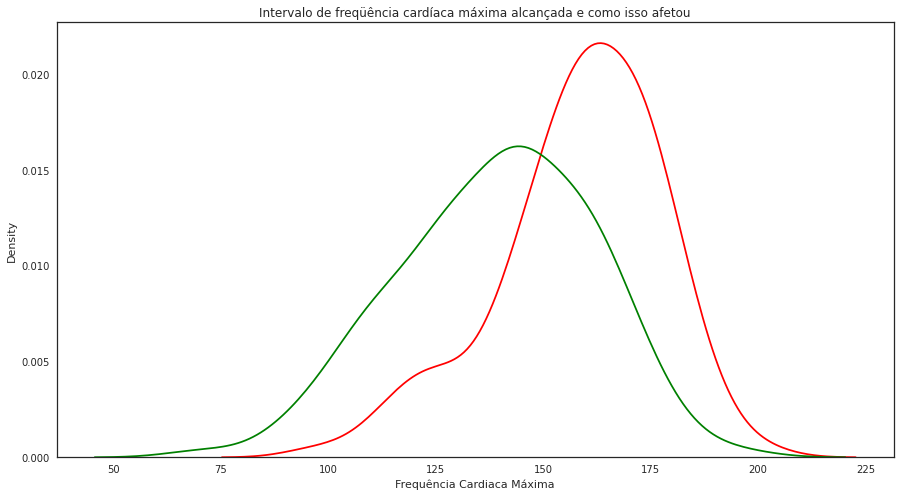

In [22]:
plt.figure(figsize=(15,8))
sns.kdeplot(data[data['output']==1]['thalachh'],color='red',label='Resultado: Sim')
sns.kdeplot(data[data['output']==0]['thalachh'],color='green',label='Resultado: Não')
plt.title('Intervalo de freqüência cardíaca máxima alcançada e como isso afetou')
plt.xlabel("Frequência Cardiaca Máxima")
plt.show()

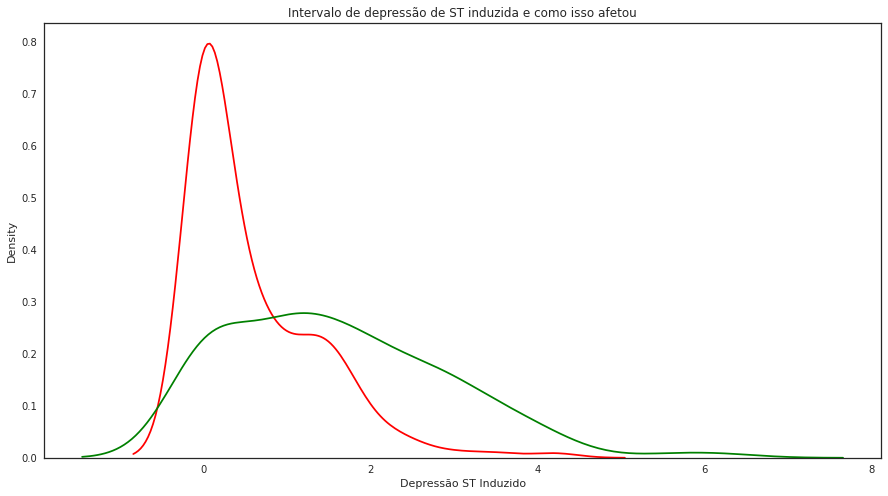

In [23]:
plt.figure(figsize=(15,8))
sns.kdeplot(data[data['output']==1]['oldpeak'],color='red',label='Resultado: Sim')
sns.kdeplot(data[data['output']==0]['oldpeak'],color='green',label='Resultado: Não')
plt.title('Intervalo de depressão de ST induzida e como isso afetou')
plt.xlabel("Depressão ST Induzido")
plt.show()

/home/felipe/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/felipe/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/felipe/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/felipe/

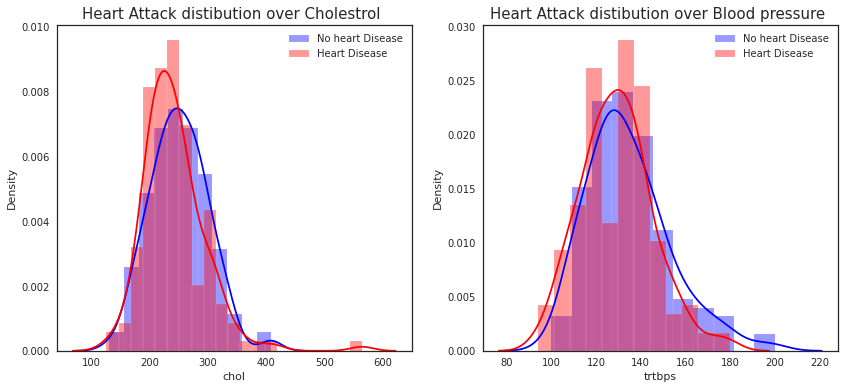

In [31]:
fig=plt.figure(figsize=(14, 6))
fig = plt.subplot(121)
sns.distplot(data[data['output'] == 0]["chol"], color='blue',label='No heart Disease') 
sns.distplot(data[data['output'] == 1]["chol"], color='red',label='Heart Disease') #Red for heart disease
plt.title('Heart Attack distibution over Cholestrol ', fontsize=15)
plt.legend()
# plt.show()
fig = plt.subplot(122)
sns.distplot(data[data['output'] == 0]["trtbps"], color='blue',label='No heart Disease') 
sns.distplot(data[data['output'] == 1]["trtbps"], color='red',label='Heart Disease') #Red for heart disease
plt.title('Heart Attack distibution over Blood pressure ', fontsize=15)
plt.legend();

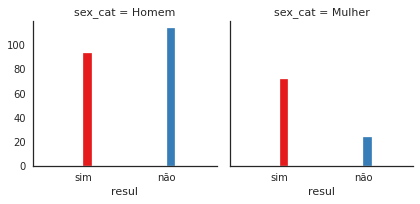

In [25]:
g = sns.FacetGrid(data=data,col='sex_cat', hue='resul',palette='Set1')
g.map(plt.hist,'resul');

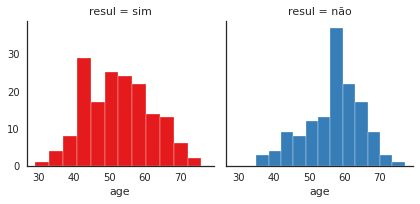

In [26]:
g=sns.FacetGrid(data,col='resul', hue='resul',palette='Set1')
g.map(plt.hist,"age",bins=12);

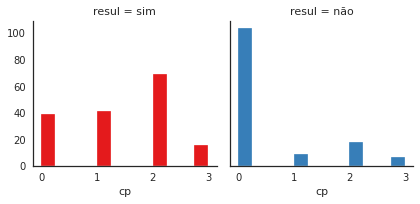

In [27]:
g=sns.FacetGrid(data,col='resul', hue='resul',palette='Set1')
g.map(plt.hist,"cp",bins=12);

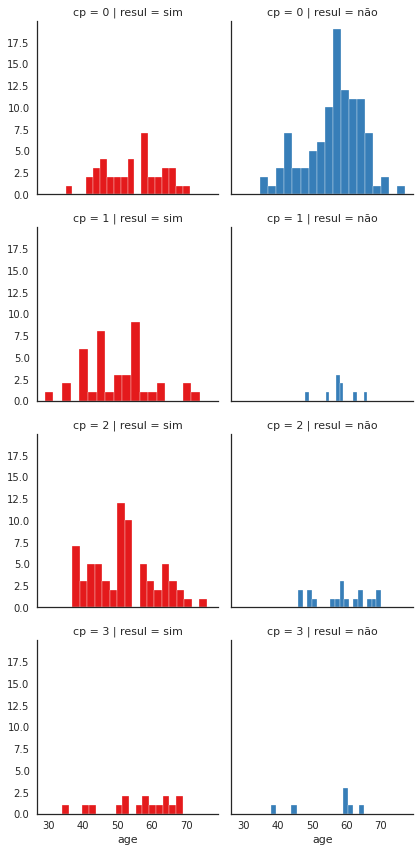

In [28]:
g=sns.FacetGrid(data,col="resul",row="cp",hue='resul', palette='Set1')
g.map(plt.hist,"age",bins=18);

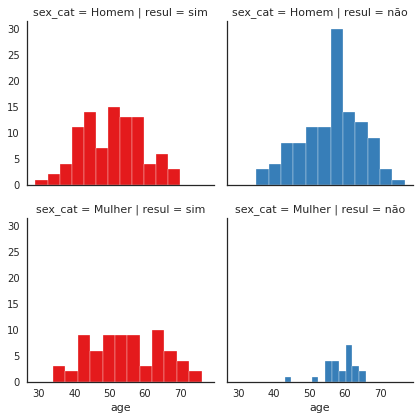

In [29]:
g=sns.FacetGrid(data,col="resul",row="sex_cat", hue='resul', palette='Set1')
g.map(plt.hist,"age",bins=12);
plt.rcParams['figure.figsize'] = (12.5, 10.5)


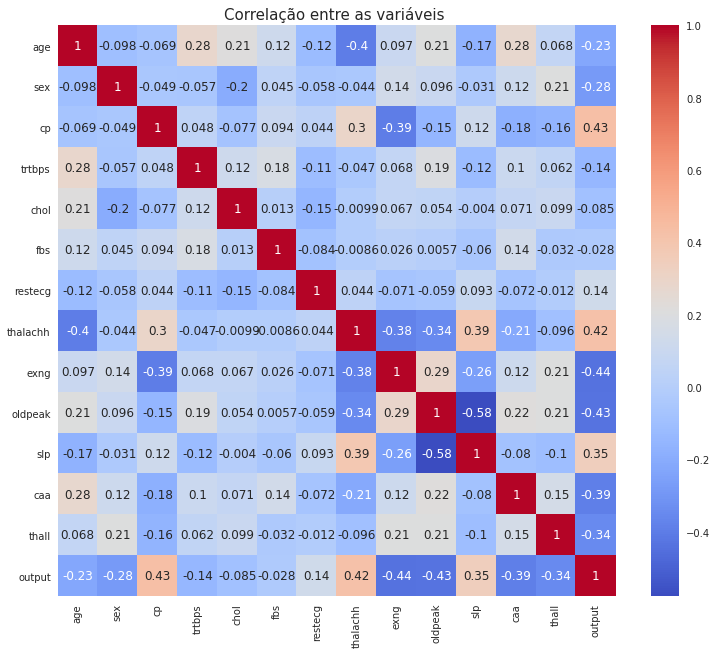

In [30]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.rcParams['figure.figsize'] = (10.5, 10.5)
plt.title('Correlação entre as variáveis ', fontsize=15);

# Outlier

- Para identificar dados com outliers, vamos utilizar os gráficos de **Boxplot**. 

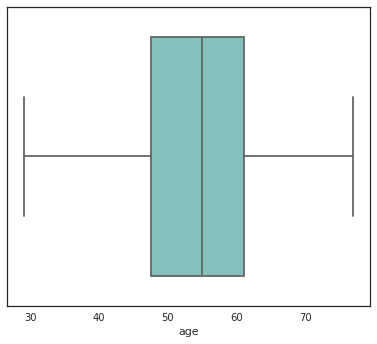

In [39]:
plt.rcParams['figure.figsize'] = (6.5, 5.5)
sns.boxplot(x=df1['age'],palette='GnBu');

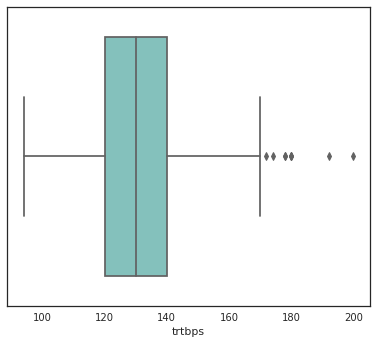

In [40]:
plt.rcParams['figure.figsize'] = (6.5, 5.5)
sns.boxplot(x=df1['trtbps'],palette='GnBu');

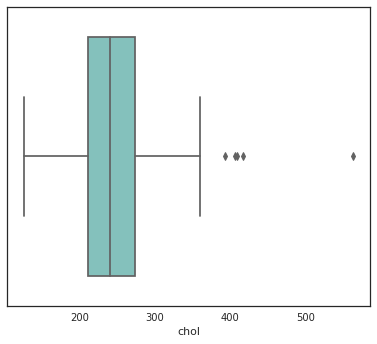

In [41]:
plt.rcParams['figure.figsize'] = (6.5, 5.5)
sns.boxplot(x=df1['chol'],palette='GnBu');

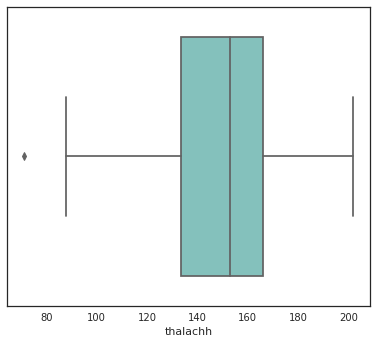

In [42]:
plt.rcParams['figure.figsize'] = (6.5, 5.5)
sns.boxplot(x=df1['thalachh'],palette='GnBu');

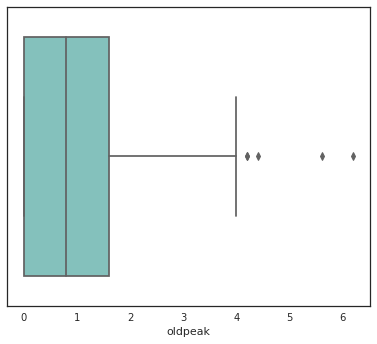

In [43]:
plt.rcParams['figure.figsize'] = (6.5, 5.5)
sns.boxplot(x=df1['oldpeak'],palette='GnBu');

## Pré Processamento dos Dados

- Nesta etapa, vamos tratar os outliers. O primeiro passo será fazer uma cópia do df1. Após fazermos a cópia, vamos tratar os outliers. Em seguida vamos gerar 2 modelos, um com os dados de outliers tratados e o outro com os dados originais. Em seguida, vamos comparar os resultados dos modelos. 

In [44]:
df2 = df1.copy()

In [46]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

In [47]:
#we handled outlier now by make point with in Q1 and Q3
for col in df1.columns:
    df1.loc[(df1[col] < (Q1[col] - 1.5 * IQR[col])) | (df1[col] > (Q3[col] + 1.5 * IQR[col])), col] = df1[col].median()

Pronto, após transformação dos dados, vamos treinar o nosso modelo com os 2 dataframes: um com os outliers tratados e o outro com os dados originais. 

In [49]:
from pycaret.classification import *

In [50]:
heart = setup(data = df1, target = 'output', session_id=123)


In [51]:
# return best model
best = compare_models()

In [52]:
model = create_model('lr') #rr is the id of the model

In [53]:
# tune hyperparameters of decision tree
tuned_model = tune_model(model, optimize='Accuracy')

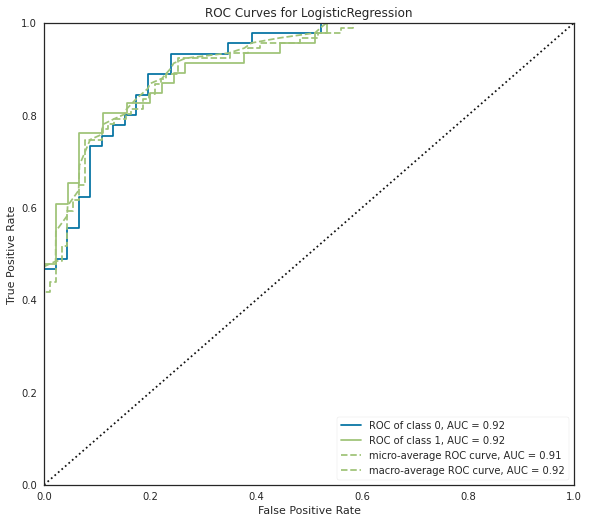

In [56]:
# plotting a model
plt.rcParams['figure.figsize'] = (9.5, 8.5)
plot_model(model)

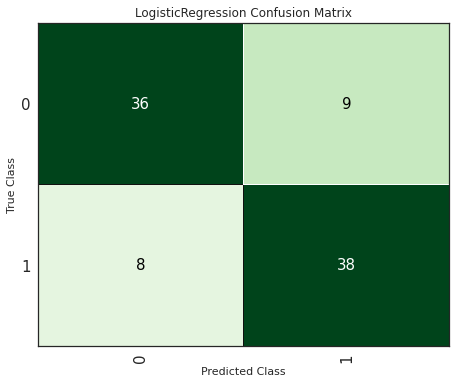

In [55]:
# plotting a model
plot_model(model, plot = 'confusion_matrix')


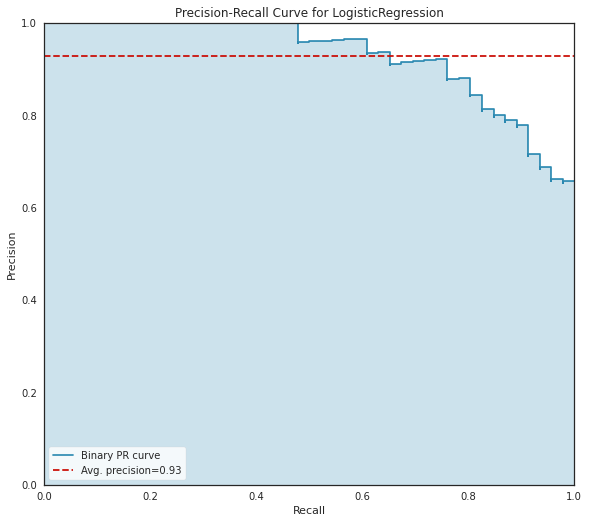

In [57]:
plot_model(model, plot = 'pr')



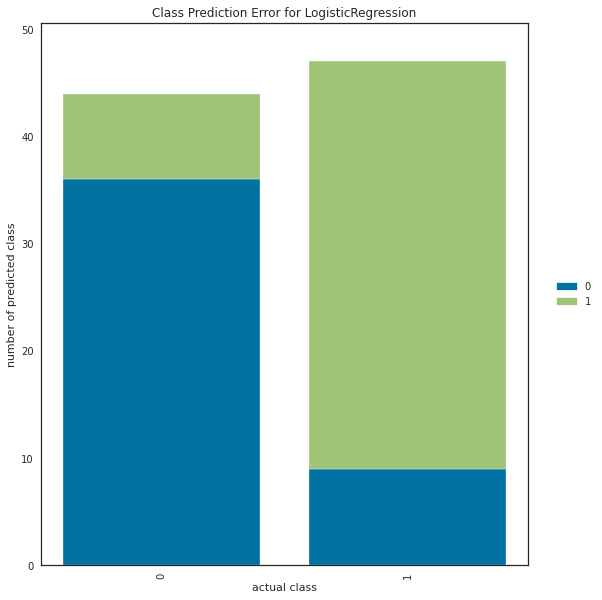

In [58]:
plot_model(model, plot = 'error')



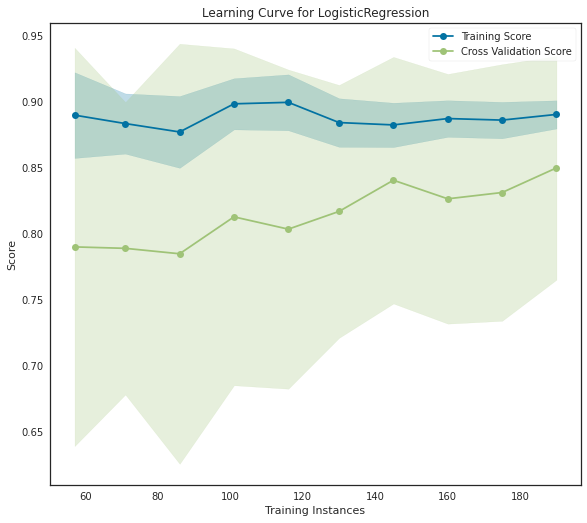

In [59]:
plot_model(model, plot = 'learning')



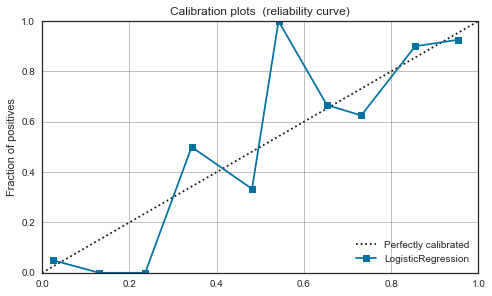

In [45]:
plot_model(model, plot = 'calibration')



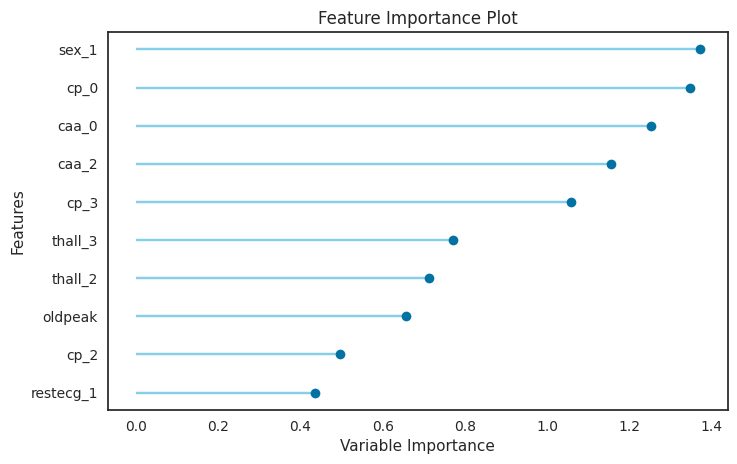

In [60]:
plt.rcParams['figure.figsize'] = (10, 9)
plot_model(model, plot = 'feature')



In [61]:
plot_model(model, plot = 'parameter')

Parameters
C                        1.0
class_weight            None
dual                   False
fit_intercept           True
intercept_scaling          1
l1_ratio                None
max_iter                1000
multi_class             auto
n_jobs                  None
penalty                   l2
random_state             123
solver                 lbfgs
tol                   0.0001
verbose                    0
warm_start             False

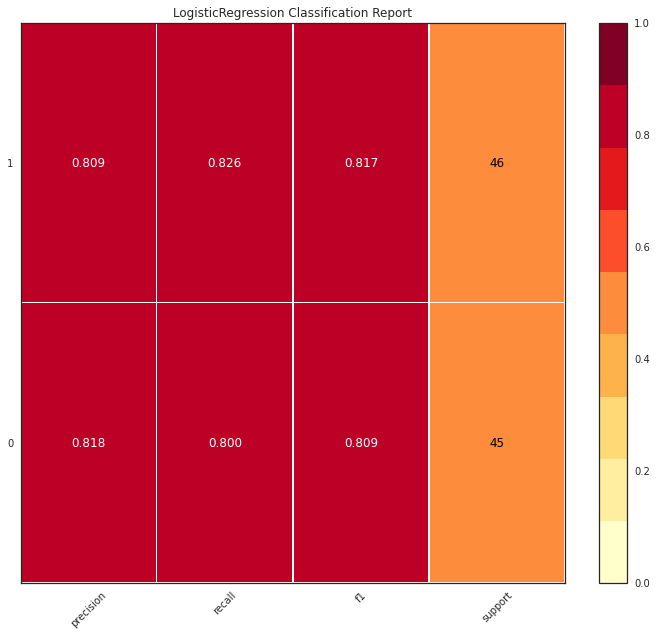

In [62]:
plot_model(model, plot='class_report')

In [49]:
interpret_model(model)

SystemExit: (Type Error): This function only supports tree based models for binary classification.

In [63]:
interpret_model(model, plot = 'correlation')

TypeError: This function only supports tree based models for binary classification: catboost, rf, xgboost, dt, et, lightgbm.

In [ ]:
interpret_model(model, plot = 'reason')

In [ ]:
# reason plot at observation level
interpret_model(model, plot = 'reason', observation = 2) #observation 1 for testset

In [64]:
pred_holdout = predict_model(model)

In [65]:
model_final = finalize_model(model)

In [66]:
predictions = predict_model(model_final, data=df1)
predictions

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    0        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    0        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  Label   Score  
0      0      1       1      1  0.6821  
1      0      2       1      1  0.8067  
2      0      2       1      1  0.9676  
3      0      2       1      1  0.9488  
4      0      2       1      1  0.8270  
..   ...    ...     ...    ...     ...  
298    0      3       0      0  0.7256  
299    0      3       0      1  0.5638  
300    2      3       0      0  0.9930  
301    1      3       0      0  0.9743  
302    1      2       0      1  0.7925  

[303 rows x 16 columns]

In [67]:
predictions.Label.value_counts()

1    177
0    126
Name: Label, dtype: int64

In [68]:
predictions.output.value_counts()

1    165
0    138
Name: output, dtype: int64

###### The result model have a diferent of 8 person with classification they could have problems of attack heart if comper the results real. 

In [ ]:
data.sex = pd.Categorical(data.sex).codes
data.cp = pd.Categorical(data.cp).codes
data.fbs = pd.Categorical(data.fbs).codes
data.restecg = pd.Categorical(data.restecg).codes
data.exng = pd.Categorical(data.exng).codes
data.slp = pd.Categorical(data.slp).codes
data.caa = pd.Categorical(data.caa).codes
data.thall = pd.Categorical(data.thall).codes

In [70]:
model1 = setup(df2, target = 'output', session_id=123)

In [71]:
# return best model
best = compare_models()

In [90]:
model1 = create_model('et')

In [91]:
tuned_model1 = tune_model(model1)

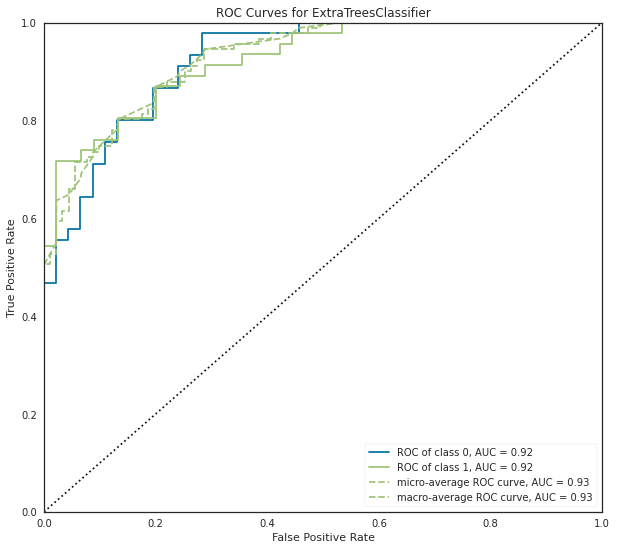

In [92]:
plot_model(tuned_model1)

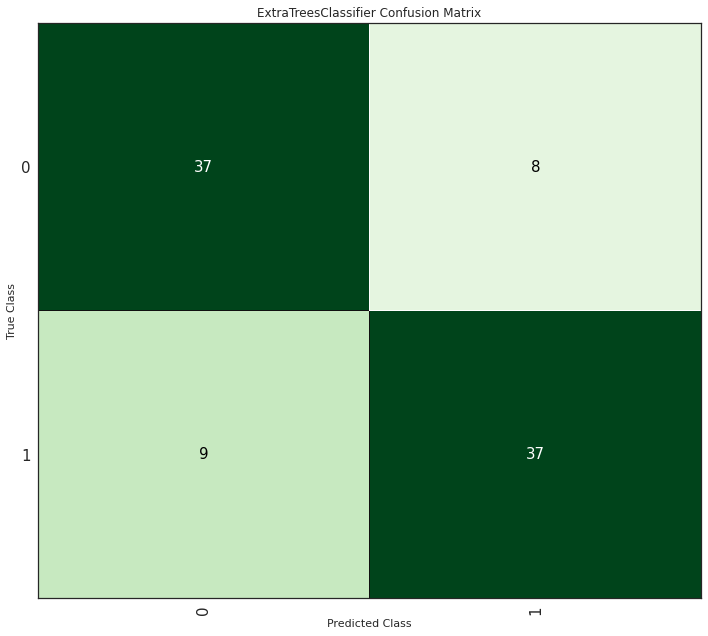

In [93]:
# plotting a model
plot_model(tuned_model1, plot = 'confusion_matrix')

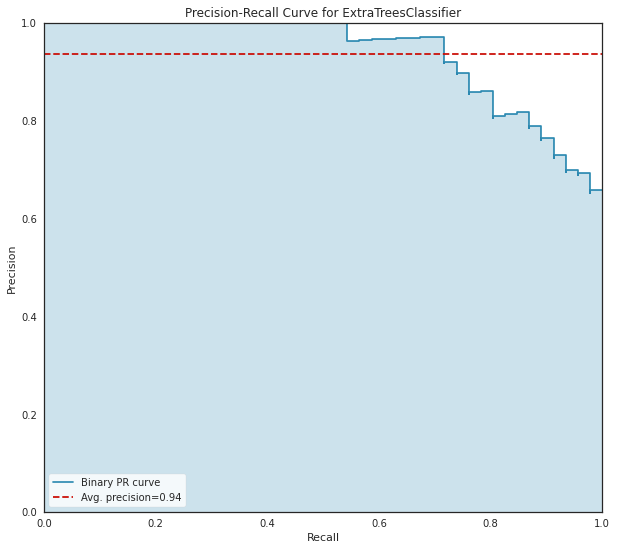

In [94]:
plot_model(tuned_model1, plot = 'pr')

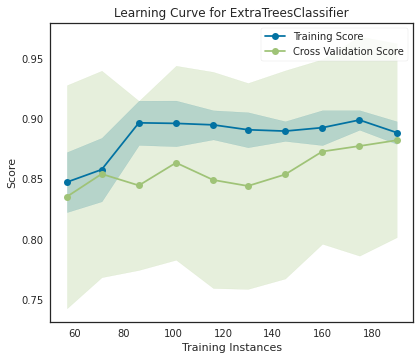

In [95]:
plt.rcParams['figure.figsize'] = (6.5, 5.5)
plot_model(tuned_model1, plot = 'learning')

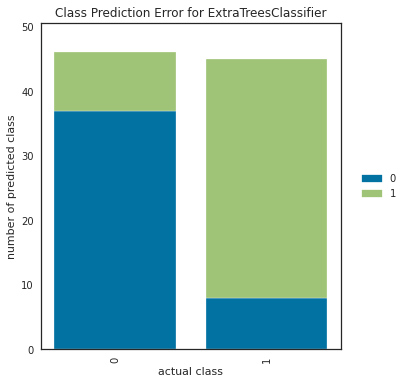

In [96]:
plot_model(tuned_model1, plot = 'error')

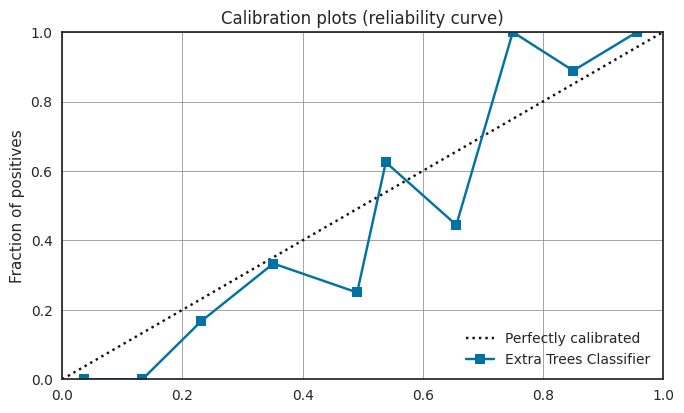

In [97]:
plot_model(tuned_model1, plot = 'calibration')

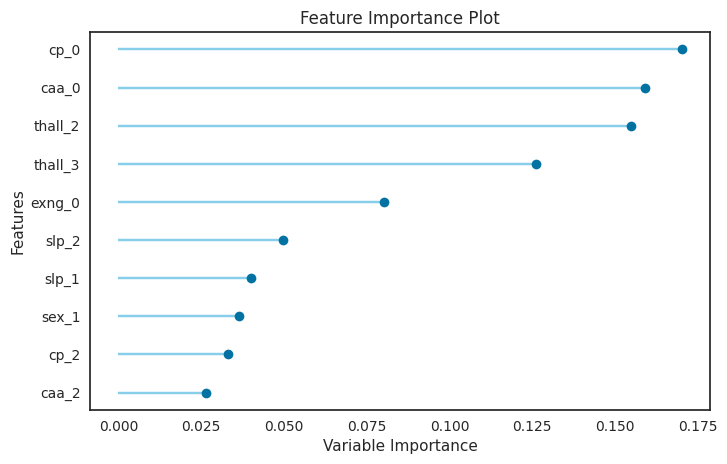

In [98]:
plt.rcParams['figure.figsize'] = (10, 9)
plot_model(tuned_model1, plot = 'feature')

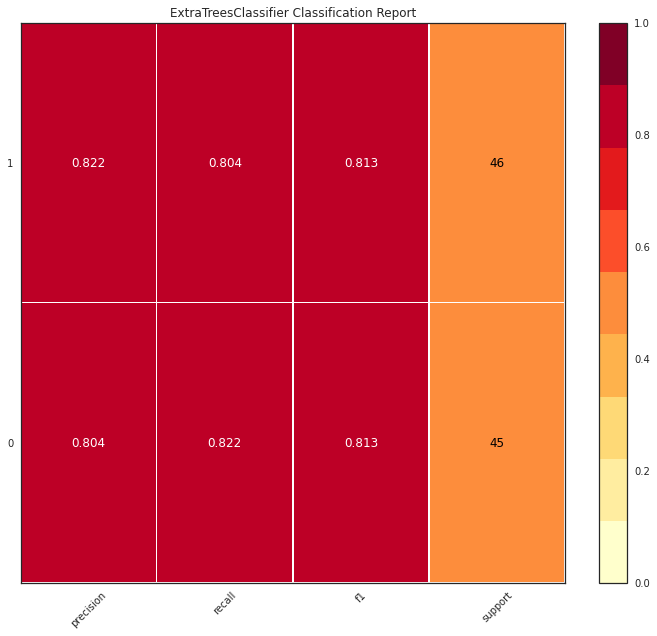

In [99]:
plot_model(tuned_model1, plot='class_report')

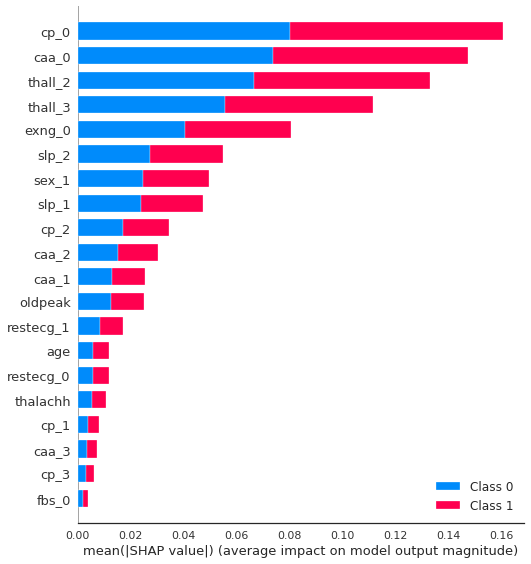

In [100]:
interpret_model(tuned_model1)

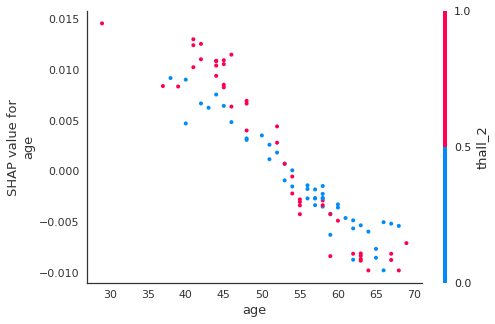

In [102]:
interpret_model(tuned_model1, plot = 'correlation')

In [103]:
interpret_model(tuned_model1, plot = 'reason')

In [105]:
interpret_model(tuned_model1, plot = 'reason', observation = 25)

In [106]:
pred_holdout = predict_model(tuned_model1)

In [107]:
model_pred_new1 = predict_model(tuned_model1, data = df2) #new_data is pd dataframe


In [108]:
model_pred_new1['Label'].value_counts()


1    170
0    133
Name: Label, dtype: int64

In [109]:
model_pred_new1.output.value_counts()

1    165
0    138
Name: output, dtype: int64

## Improving the model

In [135]:
data1 = df1.copy()


In [111]:
del data1['age']
del data1['restecg']
del data1['fbs']
del data1['chol']
del data1['trtbps']
del data1['thalachh']


In [136]:
data1

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    0        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    0        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

Variáveis que possívelmente serão excluidas:
* Oldpeak
* FBS
* Chol

del data1['trtbps']

del data1['fbs']

array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'exng'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>]],
      dtype=object)

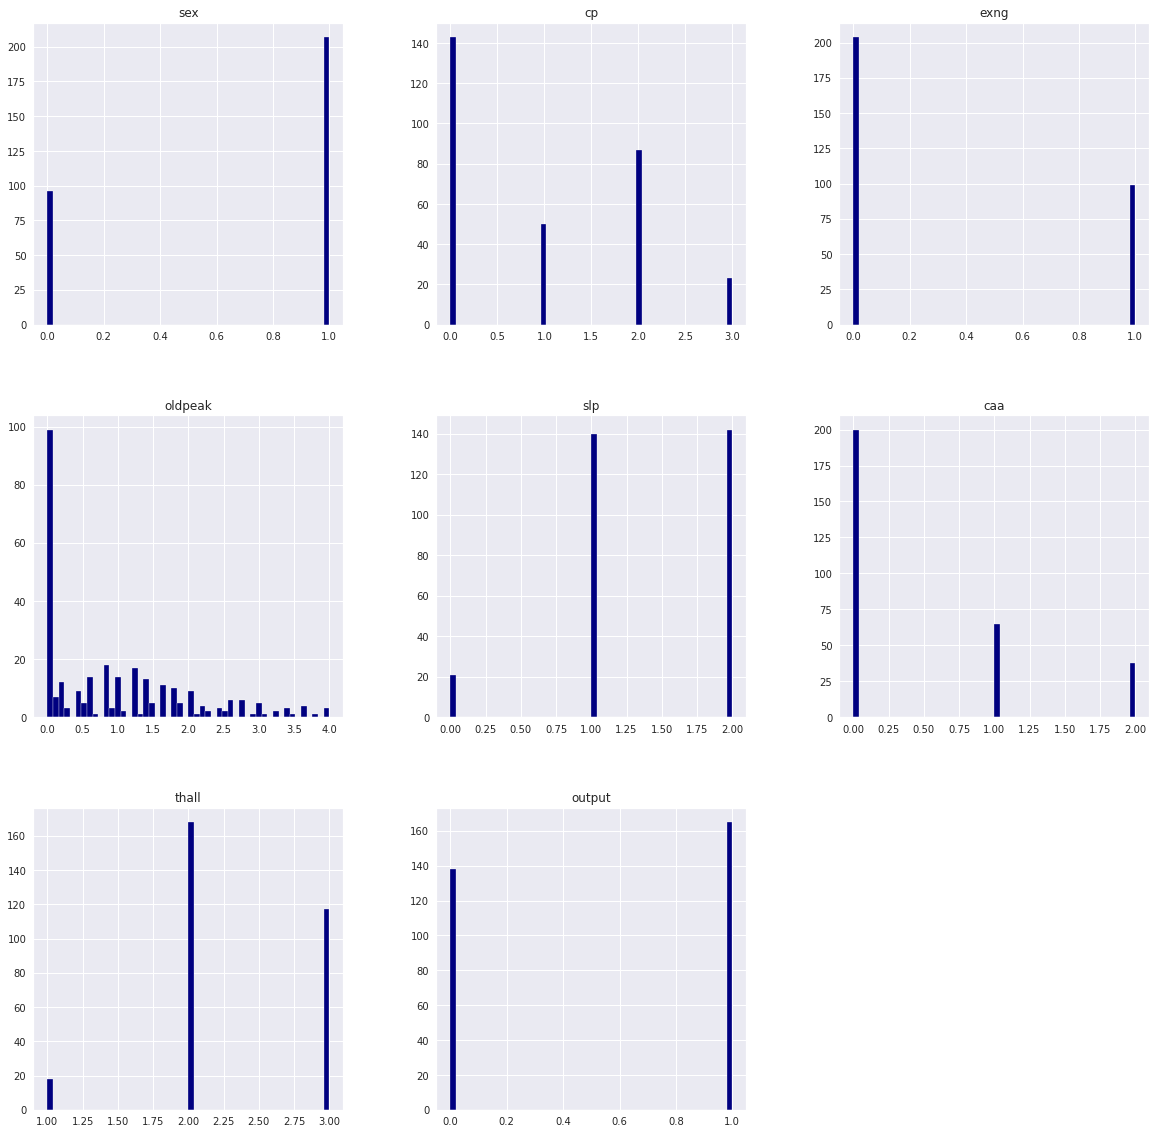

In [113]:
sns.set_style('dark')
data1.hist(bins=50,figsize=(20,20),color='navy')

In [137]:
model1 = setup(data1, target = 'output', session_id=123, normalize=True)

In [138]:
best = compare_models()

In [141]:
model2 = create_model('catboost')

In [142]:
tuned2 = tune_model(model2)

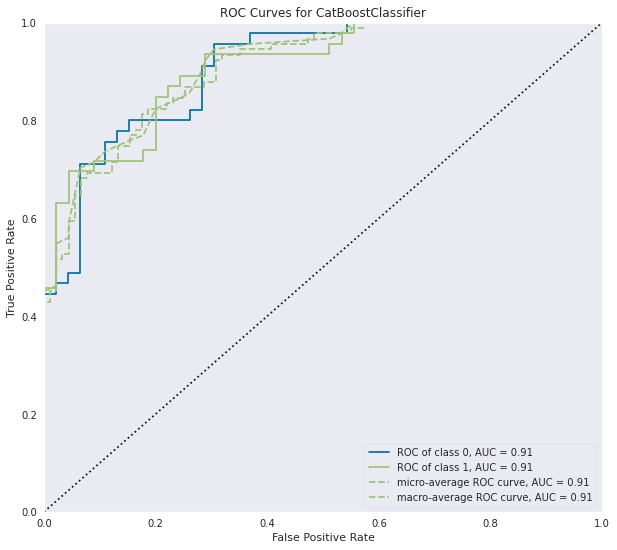

In [145]:
plot_model(model2)

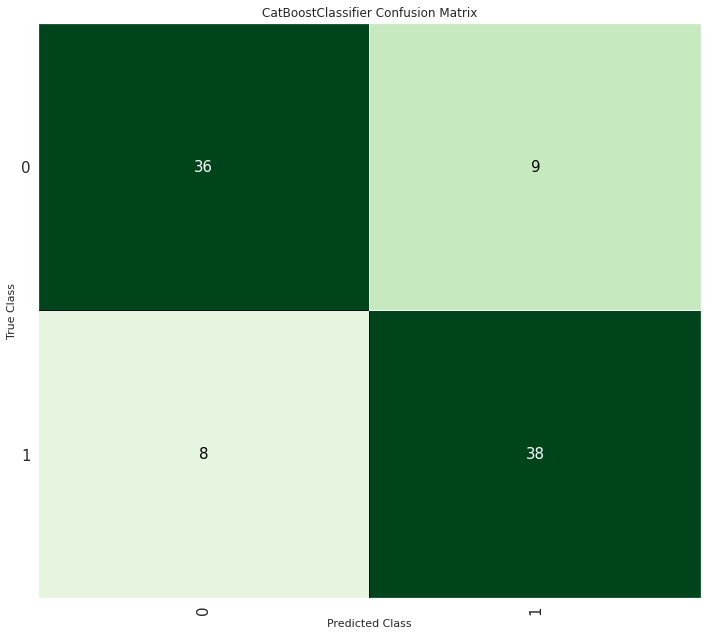

In [146]:
plot_model(model2, plot='confusion_matrix')

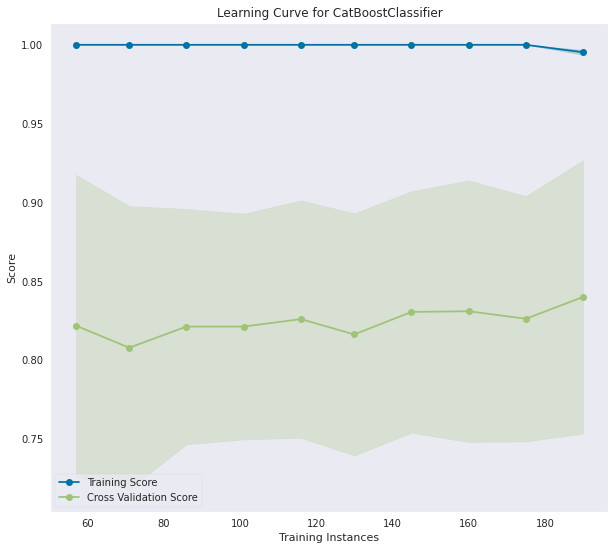

CPU times: user 1.45 s, sys: 61.8 ms, total: 1.51 s
Wall time: 2min 27s


In [147]:
%%time
plot_model(model2, plot='learning')

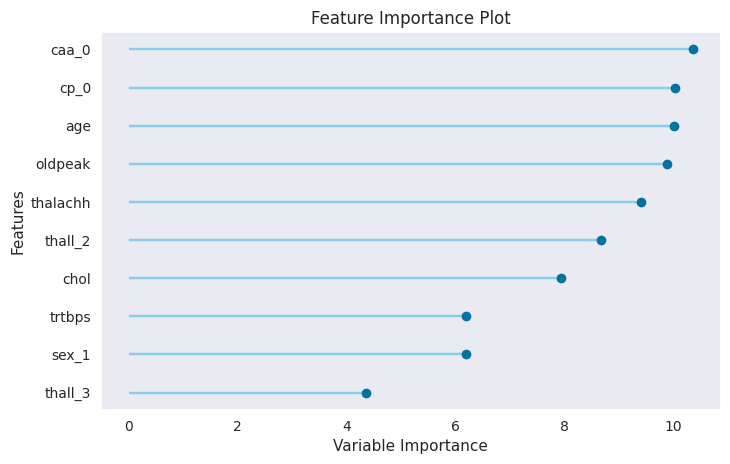

CPU times: user 789 ms, sys: 16.1 ms, total: 805 ms
Wall time: 789 ms


In [148]:
%%time
plot_model(model2, plot='feature')

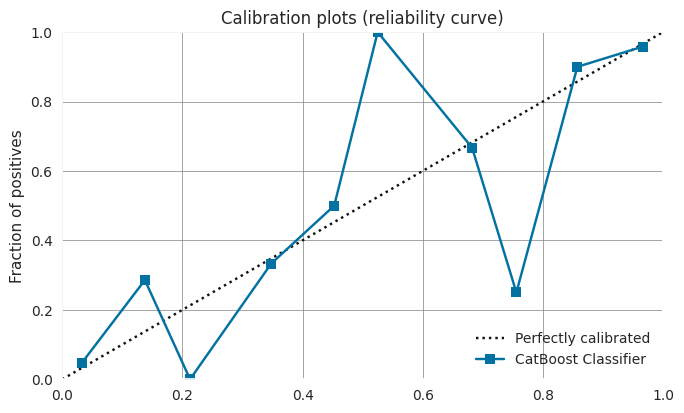

CPU times: user 819 ms, sys: 194 ms, total: 1.01 s
Wall time: 777 ms


In [149]:
%%time
plot_model(model2, plot='calibration')

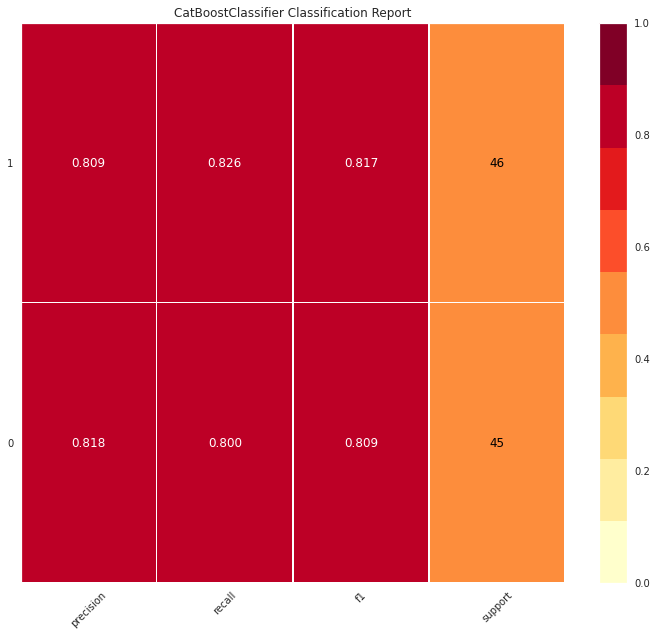

In [150]:
plot_model(model2, plot='class_report')

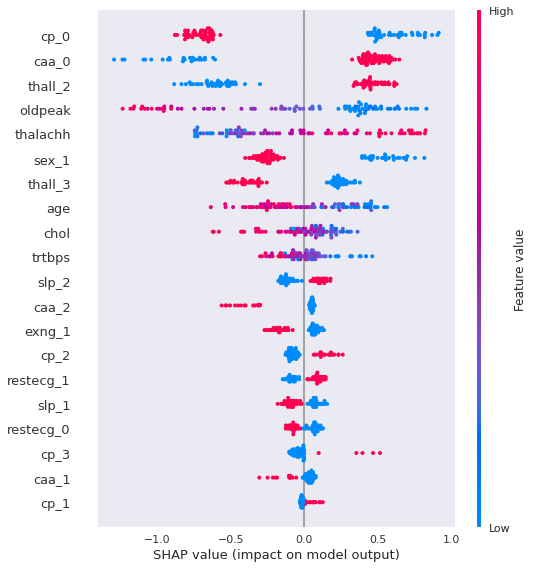

In [151]:
interpret_model(model2)

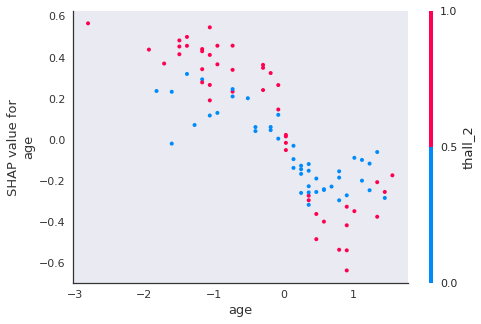

In [152]:
interpret_model(model2, plot = 'correlation')

In [153]:
interpret_model(model2, plot = 'reason')

In [154]:
# reason plot at observation level
interpret_model(model2, plot = 'reason', observation = 1) #observation 1 for testset

In [155]:
model_pred_holdout = predict_model(model2)

In [156]:
model_pred_new = predict_model(model2, data = data1) #new_data is pd dataframe

In [157]:
model_pred_new['Label'].value_counts()

1    167
0    136
Name: Label, dtype: int64

In [158]:
model_pred_new.output.value_counts()

1    165
0    138
Name: output, dtype: int64